In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import cohen_kappa_score

In [3]:
GROUP = 6
MAX_PART = 14

# Preprocess

In [4]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']

col_names = ['Participant ID', 'Song ID'] + feature_names

dfs = []

for i in range(GROUP):
    for j in range(MAX_PART):
        filename = './results/evaluation_' + str(i) + chr(65 + j) + '.csv'
        if not Path(filename).is_file():
            continue
        raw_data = pd.read_csv(filename, header=None).to_numpy(dtype=np.float32)[:, 0:len(feature_names) + 1].tolist()
        for row in raw_data:
            row.insert(0, i * 100 + j)
            row[1] = int(row[1])
        dfs.append(pd.DataFrame(raw_data, columns=col_names))

evaluation = pd.concat(dfs).reset_index()
evaluation

,index,Participant ID,Song ID,Ornamentation,Grooviness,Familiarity,Liking,Consonance,Valence,Excitement,Vocal Range,Sound Quality,Tempo,Rhythmic Regularity,Vocal Tension,Vocal Texture
0,0,0,0,100.0,0.0,50.0,50.0,50.0,100.0,50.0,50.0,0.0,50.0,100.0,100.0,50.0
1,1,0,1,100.0,0.0,50.0,50.0,100.0,100.0,0.0,100.0,50.0,100.0,50.0,50.0,0.0
2,2,0,2,0.0,0.0,50.0,50.0,50.0,50.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
3,3,0,3,100.0,50.0,50.0,50.0,50.0,100.0,50.0,50.0,0.0,100.0,100.0,100.0,50.0
4,4,0,4,0.0,0.0,50.0,0.0,50.0,50.0,100.0,50.0,50.0,50.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,509,25,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,0.0,100.0,50.0,50.0,50.0
311,1,509,26,100.0,0.0,50.0,0.0,0.0,50.0,50.0,50.0,0.0,50.0,50.0,100.0,50.0
312,2,509,27,100.0,0.0,50.0,50.0,50.0,50.0,50.0,100.0,50.0,0.0,50.0,50.0,100.0
313,3,509,28,100.0,100.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,100.0,50.0,50.0,100.0


In [21]:
matrix = []
for group_id in range(GROUP):
    subset = evaluation[evaluation.apply(lambda x: x['Song ID'] >= group_id * 5 and x['Song ID'] < (group_id + 1) * 5, axis=1)]
    participants = subset.filter(items=['Participant ID'])
    participants = np.unique(participants.to_numpy().flatten())
    for x in participants:
        for y in participants:
            if x < y:
                for feature in feature_names:
                    data_x = subset[subset.apply(lambda t: t['Participant ID'] == x, axis=1)]
                    data_x = data_x.sort_values(by=['Song ID']).filter(items=[feature]).to_numpy().flatten()
                    
                    data_y = subset[subset.apply(lambda t: t['Participant ID'] == y, axis=1)]
                    data_y = data_y.sort_values(by=['Song ID']).filter(items=[feature]).to_numpy().flatten()

                    cohen = cohen_kappa_score(data_x, data_y, [0, 50, 100], weights='quadratic')
                    matrix.append([feature, cohen])

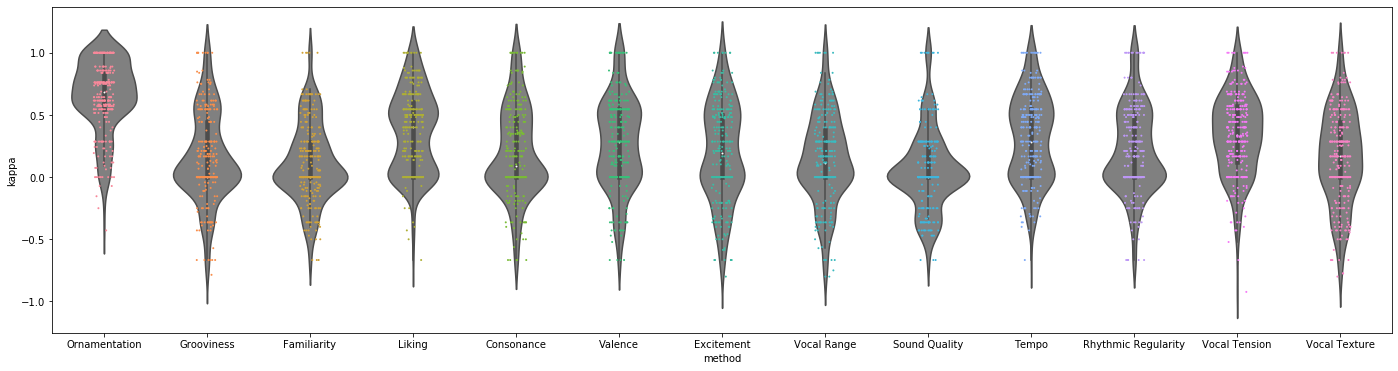

In [30]:
df = pd.DataFrame(matrix, index=range(len(matrix)), columns=['method', 'kappa'])

plt.figure(figsize=(24, 6))
sns.violinplot(x="method", y="kappa", data=df, color="0.5")
sns.stripplot(x="method", y="kappa", data=df, jitter=1, size=2)

plt.show()